In [1]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.image as mpimg

In [2]:
class pawn:
    
    #Constructor
    def __init__(self, x=0, y=0):
        self.x, self.y=x, y
    
    #Funcion de la clase para retornar una representacion de la clase en un string
    #si no se define esto, al llamar pawn bota la direccion del objeto
    def __repr__(self):
        return "["+str(self.x)+", "+str(self.y)+"]"
    
    #Movimiento:
    def left(self):
        if self.x < 0:
            self.x-=1
    def right(self):
        if self.x < 8:
            self.x+=1
    def up(self):
        if self.y > 0:
            self.y-=1
    def down(self):
        if self.y < 8:
            self.y+=1
    #Agregar validación cuando hayan 2 pawns adyacentes o 1 pawn y 1 pared
    #Imprime las coordenadas / para debug
    def coords(self):
        return [self.x, self.y]

In [3]:
class board_pawn:
    #Tablero que contiene pawns
    #Constructor
    def __init__(self):
        self.pawn_list={}
        self.board_wall=board_wall()
    
    #Añade el pawn a un diccionario
    def add_pawn(self, name, pawn):
        self.pawn_list[name]=pawn
    
    #Formatea el diccionario actual a una lista para usarlo en el drawBoard
    def board(self):
        board=[[0 for _ in range(9)] for _ in range(9)]
        for i in self.pawn_list:
            board[self.pawn_list[i].y][self.pawn_list[i].x]=1
        return board
    
    def check_ady_pawn(self, name):
        pawn_coord_list=[]
        for i in self.pawn_list.values():
            pawn_coord_list.append(tuple(i.coords()))
        if len(pawn_coord_list)!=len(set(pawn_coord_list)):
            return True
        return False
    
    def move_pawn(self, name, direction):
        x=self.pawn_list[name].x
        y=self.pawn_list[name].y
        fx=None
        fy=None
        move=[[],[]]
        if direction == "up":
            fx=x
            fy=y-1
            move=[[x, y], [fx, fy]]
            if move not in self.board_wall.restricted_moves():
                self.pawn_list[name].up()
        elif direction == "down":
            fx=x
            fy=y+1
            move=[[x, y], [fx, fy]]
            if move not in self.board_wall.restricted_moves():
                self.pawn_list[name].down()
        elif direction == "left":
            fx=x-1
            fy=y
            move=[[x, y], [fx, fy]]
            if move not in self.board_wall.restricted_moves():
                self.pawn_list[name].left()
        elif direction == "right":
            fx=x+1
            fy=y
            move=[[x, y], [fx, fy]]
            if move not in self.board_wall.restricted_moves():
                self.pawn_list[name].right()
        #logica si existe un pawn adyacente
        if self.check_ady_pawn(name):
            self.move_pawn(name, direction)

In [4]:
class wall:

    #Constructor
    def __init__(self, x=0, y=0, direction="left"):
        self.x, self.y, self.direction=x, y, direction
    
    def __repr__(self):
        return "["+str(self.x)+", "+str(self.y)+", " + self.direction + "]"

In [5]:
class board_wall:
    #Contenedor de paredes
    #Constructor
    def __init__(self):
        self.wall_list={}

    #Agrega wall al diccionario
    def add_wall(self, name, wall):
        self.wall_list[name]=wall

    def board(self):
        board=[[0 for _ in range(10)] for _ in range(10)]
        for_delete=[]
        for i in self.wall_list:
            if self.wall_list[i].direction == "left" and self.wall_list[i].x >= 2 and self.wall_list[i].y >= 1 and self.wall_list[i].y <= 8:
            
                board[self.wall_list[i].y][self.wall_list[i].x]=2
                board[self.wall_list[i].y][self.wall_list[i].x-1]=2
                

            elif self.wall_list[i].direction == "up" and self.wall_list[i].x <= 8 and self.wall_list[i].x >=1 and self.wall_list[i].y >= 2 and self.wall_list[i].y <= 9:
                board[self.wall_list[i].y][self.wall_list[i].x]=3
                board[self.wall_list[i].y-1][self.wall_list[i].x]=3
                
            else:
                for_delete.append(i)
                print("Invalid wall")
        for i in for_delete:
            del self.wall_list[i]
        return board
    def restricted_moves(self):
        invalid_moves=[]
        for i in self.wall_list:
            if self.wall_list[i].direction=="left":
                aux_wall=self.wall_list[i]
                invalid_moves.append([[aux_wall.x-1, aux_wall.y],[aux_wall.x-1, aux_wall.y-1]])
                invalid_moves.append([[aux_wall.x-1, aux_wall.y-1],[aux_wall.x-1, aux_wall.y]])
                invalid_moves.append([[aux_wall.x-2, aux_wall.y],[aux_wall.x-2, aux_wall.y-1]])
                invalid_moves.append([[aux_wall.x-2, aux_wall.y-1],[aux_wall.x-2, aux_wall.y]])
            elif self.wall_list[i].direction=="up":
                aux_wall=self.wall_list[i]
                invalid_moves.append([[aux_wall.x, aux_wall.y-2], [aux_wall.x-1, aux_wall.y-2]])
                invalid_moves.append([[aux_wall.x-1, aux_wall.y-2], [aux_wall.x, aux_wall.y-2]])
                invalid_moves.append([[aux_wall.x, aux_wall.y-1], [aux_wall.x-1, aux_wall.y-1]])
                invalid_moves.append([[aux_wall.x-1, aux_wall.y-1], [aux_wall.x, aux_wall.y-1]])
        return invalid_moves

In [6]:
def drawBoard(board_pawn, board_wall):
    n = len(board_pawn)
    tablero = np.zeros((n ,n, 3)) # Matriz de ceros. Doble paréntesis porque es inmutable (dupla)
    tablero += 0.8 # Degradado de color
    tablero[ ::2,  ::2] =1
    tablero[1::2, 1::2] =1 #Crea rejilla con 0.8 y 1 intercaladamente
    fig, ax = plt.subplots() #Subplots: funcion similar a buffer pero para gráficos estdísticos
    ax.imshow(tablero, interpolation='nearest')
    
    #g[posicion][valor]
    #g[fila][columna]=valor
    for y in range(len(board_pawn)):
        for x in range(len(board_pawn[y])):
            if board_pawn[y][x]==0:
                continue
            ax.text(x, y, u'\u2655', size=30, ha='center', va='center')
    for y in range(len(board_wall)):
        for x in range(len(board_wall[y])):
            if board_wall[y][x]==0:
                continue
            elif board_wall[y][x]==2:
                ax.text(x-1, y-.5, '\u2015', size=43, ha='center', va='center')
            elif board_wall[y][x]==3:
                ax.text(x-.5, y-1, '\u2015', size=43, rotation=90, ha='center', va='center')
    ax.set(xticks=[], yticks=[]) #no mostrar líneas de separación cartesianas
    ax.axis('image')
    plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


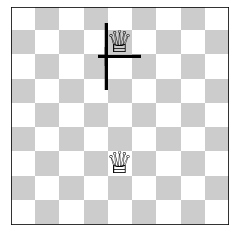

In [7]:
b1=board_pawn()
b1.add_pawn("p1", pawn(4, 1))
b1.add_pawn("p2", pawn(4, 6))
b1.board_wall.add_wall("w2", wall(5, 2, "left"))

b1.board_wall.add_wall("w1", wall(4, 3, "up"))
ya=b1.board_wall.board()
for i in ya:
    print(i)

#print(b1.board_wall.restricted_moves())
b1.move_pawn("p1", "down")
drawBoard(b1.board(), b1.board_wall.board())

{'p1': [4, 5], 'p2': [4, 6]}
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


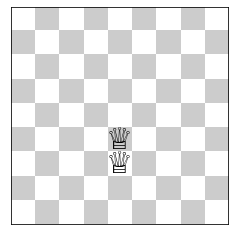

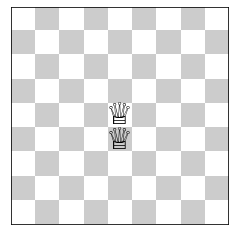

In [8]:
#creamos el tablero de piezas
b1=board_pawn()

#añadimos dos piezas al tablero
b1.add_pawn("p1", pawn(4, 5))
b1.add_pawn("p2", pawn(4, 6))
#imprimimos las piezas y sus posiciones
print(b1.pawn_list)

#imprimimos el resultado de b1.board()
print(b1.board())

#dibujamos el tablero
drawBoard(b1.board(), b1.board_wall.board())


b1.move_pawn("p2", "up") #p1 se mueve a la izq

#print(b1.pawn_list)
#print(b1.board())
drawBoard(b1.board(), b1.board_wall.board())